# Python Basics with Numpy (optional assignment)

Welcome to your first assignment. This exercise gives you a brief introduction to Python. Even if you've used Python before, this will help familiarize you with functions we'll need.  

Student: Vitor Ferreira Lavor


**Exercise**: Set test to `"Hello World"` in the cell below to print "Hello World" and run the two cells below.

In [1]:
test = "Hello World"

In [2]:
print ("test: " + test)

test: Hello World


**Expected output**:
test: Hello World

<font color='blue'>
**What you need to remember**:
- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas

## 1 - Building basic functions with numpy ##

Numpy is the main package for scientific computing in Python. It is maintained by a large community (www.numpy.org). In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. You will need to know how to use these functions for future assignments.

### 1.1 - sigmoid function, np.exp() ###

Before using np.exp(), you will use math.exp() to implement the sigmoid function. You will then see why np.exp() is preferable to math.exp().

**Exercise**: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

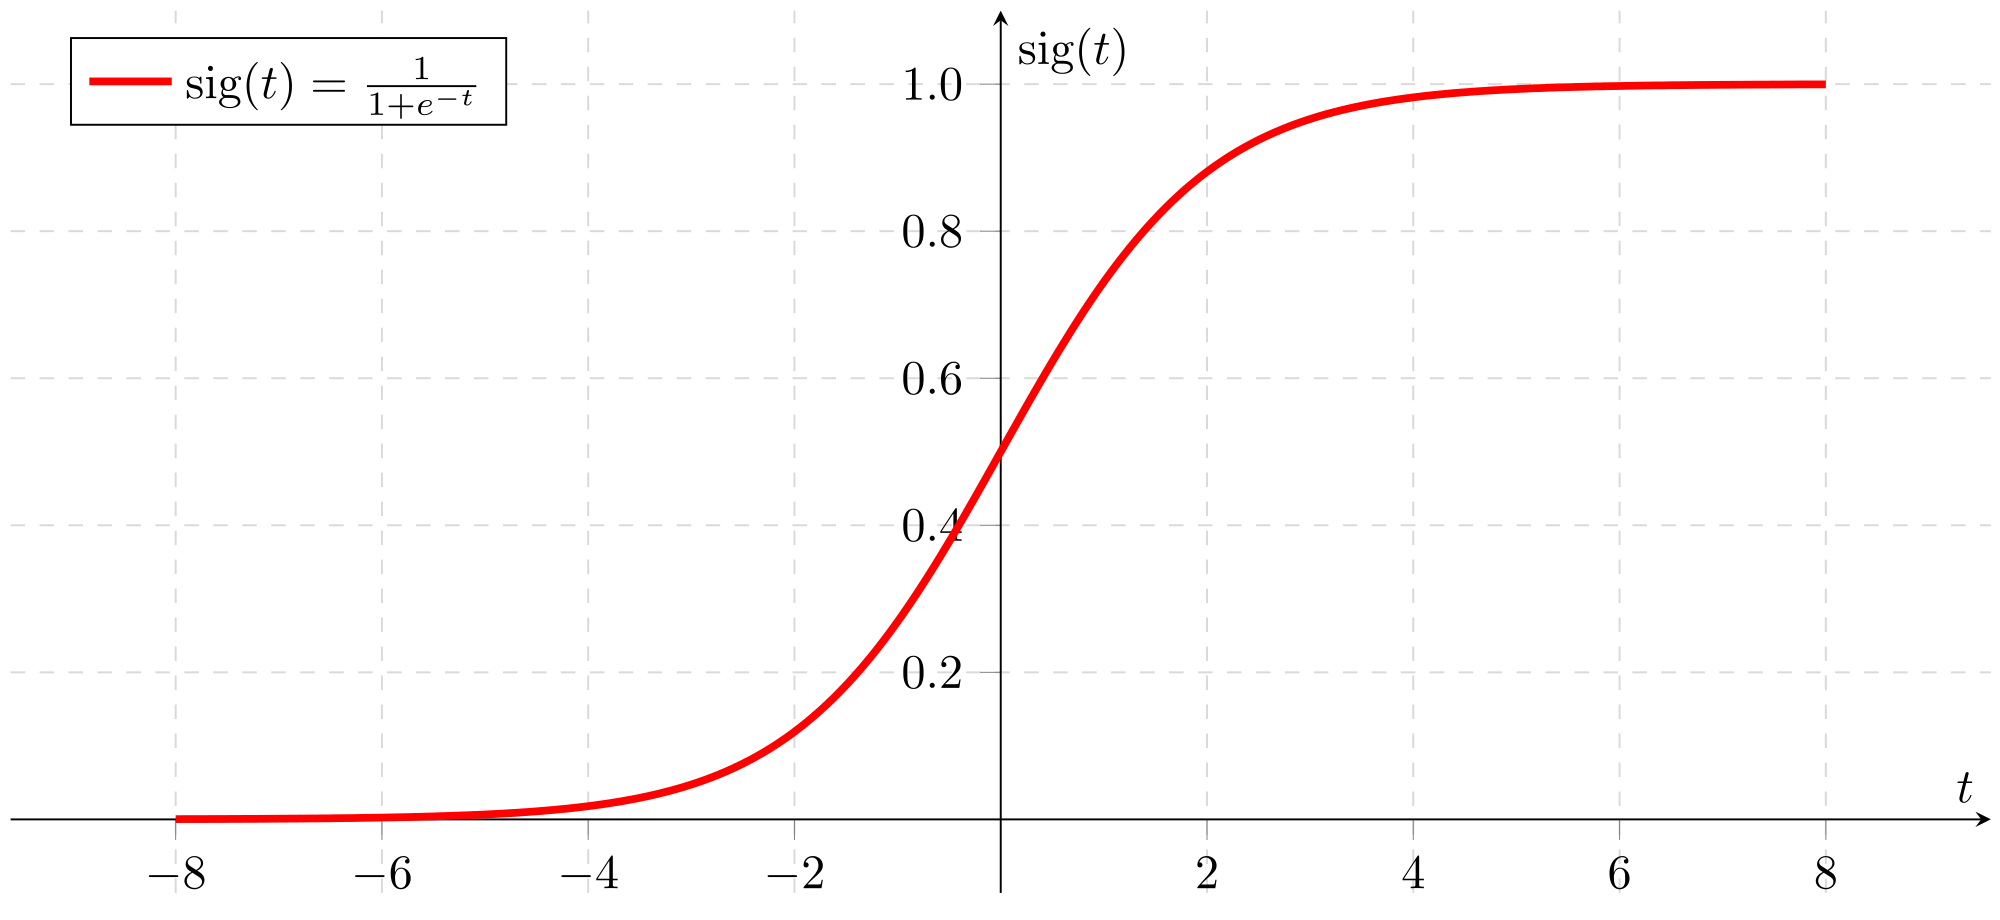

To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

In [5]:
# basic_sigmoid

import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    s = 1/(1+math.exp(-x))
       
    return s

In [6]:
basic_sigmoid(3)

0.9525741268224334

Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful. 

In [7]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

TypeError: bad operand type for unary -: 'list'

In fact, if $ x = (x_1, x_2, ..., x_n)$ is a row vector then $np.exp(x)$ will apply the exponential function to every element of x. The output will thus be: $np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$

In [8]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

[ 2.71828183  7.3890561  20.08553692]


Furthermore, if x is a vector, then a Python operation such as $s = x + 3$ or $s = \frac{1}{x}$ will output s as a vector of the same size as x.

In [9]:
# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

[4 5 6]


Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html). 

You can also create a new cell in the notebook and write `np.exp?` (for example) to get quick access to the documentation.

**Exercise**: Implement the sigmoid function using numpy. 

**Instructions**: x could now be either a real number, a vector, or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices...) are called numpy arrays. You don't need to know more for now.
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [11]:
# sigmoid

import numpy as np # this means you can access numpy functions by writing np.function() instead of numpy.function()

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    s = 1/(1+np.exp(-x))
    
    return s

In [12]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

### 1.2 - Sigmoid gradient

As you've seen in lecture, you will need to compute gradients to optimize loss functions using backpropagation. Let's code your first gradient function.

**Exercise**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [13]:
# sigmoid_derivative

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    
    s = sigmoid(x)
    ds = s*(1-s)
    
    return ds

In [14]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


### 1.3 - Reshaping arrays ###

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

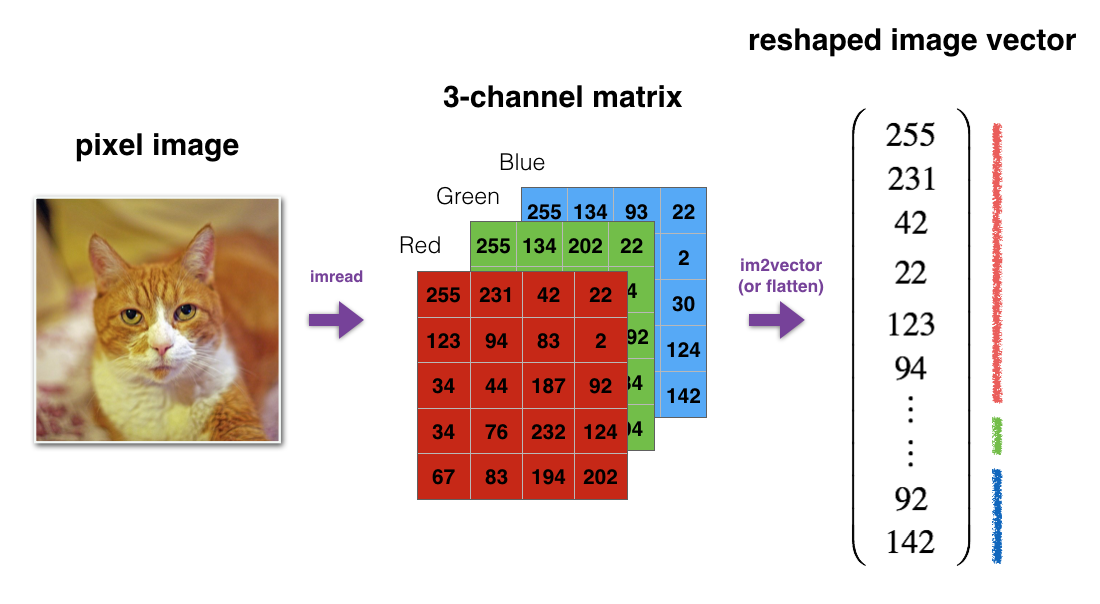

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [15]:
# image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2], 1))
    
    return v

In [16]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


### 1.4 - Normalizing rows

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$ Note that you can divide matrices of different sizes and it works fine: this is called broadcasting and you're going to learn about it in part 5.


**Exercise**: Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [19]:
# normalizeRows

def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    x_norm = np.linalg.norm(x, ord = 2, axis = 1, keepdims = True)
    
    # Divide x by its norm.
    x = x/x_norm

    return x

In [20]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


**Note**:
In normalizeRows(), you can try to print the shapes of x_norm and x, and then rerun the assessment. You'll find out that they have different shapes. This is normal given that x_norm takes the norm of each row of x. So x_norm has the same number of rows but only 1 column. So how did it work when you divided x by x_norm? This is called broadcasting and we'll talk about it now! 

### 1.5 - Broadcasting and the softmax function ####
A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

**Exercise**: Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes. You will learn more about softmax in the second course of this specialization.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

#### Note
Note that later in the course, you'll see "m" used to represent the "number of training examples", and each training example is in its own column of the matrix.  
Also, each feature will be in its own row (each row has data for the same feature).  
Softmax should be performed for all features of each training example, so softmax would be performed on the columns (once we switch to that representation later in this course).

However, in this coding practice, we're just focusing on getting familiar with Python, so we're using the common math notation $m \times n$  
where $m$ is the number of rows and $n$ is the number of columns.

In [22]:
# softmax

def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (m,n).

    Argument:
    x -- A numpy matrix of shape (m,n)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (m,n)
    """
    
    x_exp = np.exp(x)

    # Create a vector x_sum that sums each row of x_exp. Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis = 1,  keepdims = True)
    
    # Compute softmax(x) by dividing x_exp by x_sum. It should automatically use numpy broadcasting.
    s = x_exp/x_sum

    return s

In [23]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


**Note**:
- If you print the shapes of x_exp, x_sum and s above and rerun the assessment cell, you will see that x_sum is of shape (2,1) while x_exp and s are of shape (2,5). **x_exp/x_sum** works due to python broadcasting.

Congratulations! You now have a pretty good understanding of python numpy and have implemented a few useful functions that you will be using in deep learning.

<font color='blue'>
**What you need to remember:**
- np.exp(x) works for any np.array x and applies the exponential function to every coordinate
- the sigmoid function and its gradient
- image2vector is commonly used in deep learning
- np.reshape is widely used. In the future, you'll see that keeping your matrix/vector dimensions straight will go toward eliminating a lot of bugs. 
- numpy has efficient built-in functions
- broadcasting is extremely useful

## 2) Vectorization


In deep learning, you deal with very large datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can result in a model that takes ages to run. To make sure that your code is  computationally efficient, you will use vectorization. For example, try to tell the difference between the following implementations of the dot/outer/elementwise product.

In [24]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j]
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3,len(x1)) # Random 3*len(x1) numpy array
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j]
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0ms
outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 ---

In [32]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1,x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED OUTER PRODUCT ###
tic = time.process_time()
outer = np.outer(x1,x2)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1,x2)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED GENERAL DOT PRODUCT ###
tic = time.process_time()
dot = np.dot(W,x1)
toc = time.process_time()
print ("gdot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0925300000000906ms
outer = [[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
 ----- Computation time = 0.07932600000004619ms
elementwise multiplication = [81  4 10  0  0 63 10  0  0  0 81  4 25  0  0]
 ----- Computation time = 0.05755100000004454ms
gdot = [ 14.32664823  17.53785065  17.5266

As you may have noticed, the vectorized implementation is much cleaner and more efficient. For bigger vectors/matrices, the differences in running time become even bigger. 

**Note** that `np.dot()` performs a matrix-matrix or matrix-vector multiplication. This is different from `np.multiply()` and the `*` operator (which is equivalent to  `.*` in Matlab/Octave), which performs an element-wise multiplication.

### 2.1 Implement the L1 and L2 loss functions

**Exercise**: Implement the numpy vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.

**Reminder**:
- The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [25]:
# L1

def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L1 loss function defined above
    """
    
    loss = np.sum(np.abs(yhat-y))
    
    return loss

In [26]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 1.1


**Exercise**: Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful. As a reminder, if $x = [x_1, x_2, ..., x_n]$, then `np.dot(x,x)` = $\sum_{j=0}^n x_j^{2}$. 

- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [27]:
# L2

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """
    
    loss = np.sum(np.dot(yhat-y, yhat-y))
    
    return loss

In [28]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.43


Congratulations on completing this assignment. We hope that this little warm-up exercise helps you in the future assignments, which will be more exciting and interesting!

<font color='blue'>
**What to remember:**
- Vectorization is very important in deep learning. It provides computational efficiency and clarity.
- You have reviewed the L1 and L2 loss.
- You are familiar with many numpy functions such as np.sum, np.dot, np.multiply, np.maximum, etc...